# Deli case

_INPUT_

**Cost of capital: 15%**

**Investment: 120,000 €**

**Average profile tickets**
* Coffees: 50 units, 1.00 € price, 82% contribution margin
* Breakfasts: 20 units, 2.20 € price, 80% contribution margin
* Snacks: 12 units, 3.50 € price, 65% contribution margin
* Beverages: 18 units, 2.00 € price, 70% contribution margin
* Total: 100 units, 1.72 € average price, 75% average contribution margin

**Medium shopping centre**
Average daily tickets: 494 (min 407, max 581)
Fixed costs structure: 286,000 €

**Big shopping centre**
Average daily tickets: 1017 (min 872, max 1163)
Fixed costs structure: 374,000 €


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Business model description, dynamics, scenarios



* Profitability (Return on investment)
* Net Income
  * Contribution margin
    * Revenues
      * open days
      * tickets
    * Variable costs (operating costs)
  * -
  * Costs
* /
* Cost of capital
  * Assets
  * x
  * cost of capital rate



In [2]:
costOfCapital = 0.15

investment = 120000

coffeePrice = 1
coffeeCM = 0.82
breakfastPrice = 2.2
breakfastCM = 0.80
snackPrice = 3.5
snackCM = 0.65
beveragePrice = 2
beverageCM = 0.70

def dailyCoffees():
  return random.normalvariate(500,90)

def dailyBreakfasts():
  return random.normalvariate(200,36)

def dailySnacks():
  return random.normalvariate(120,22)

def dailyBeverages():
  return random.normalvariate(180,32)

def labourCosts():
  return random.randint(3,4)*26000 + 2*32000 + 48000

def rentCosts():
  return 1800*60;

def consumptionCosts():
  return random.normalvariate(26000,5000);

def labDepreciation():
  return 16000;

def furnituresDepreciation():
  return 8000;

#fixedCosts = 374000

In [3]:
def monte_carlo():

  openDays = 310

  results = 0
  dtickets = []
  drevenues = []
  doperatingIncome = []  
  dfixedCosts = []
  tickets = []
  revenues = []
  operatingIncome = []
  fixedCosts = []
  totalTickets = 0
  totalRevenues = 0
  totalOperatingIncome = 0
  totalFixedCosts = 0 #labourCosts() + rentCosts() + consumptionCosts() + labDepreciation() + furnituresDepreciation()
  devStdIncome = []

  maxIterations = 10000

  for i in range(maxIterations):
    
    coffees    = dailyCoffees()
    breakfasts = dailyBreakfasts()
    snacks     = dailySnacks()
    beverages  = dailyBeverages()
    
    dailyTickets = coffees + breakfasts + snacks + beverages
    dailyRevenue = coffees * coffeePrice + breakfasts * breakfastPrice + snacks * snackPrice + beverages * beveragePrice
    dailyIncome  = coffees * coffeePrice * coffeeCM + breakfasts * breakfastPrice * breakfastCM + snacks * snackPrice * snackCM + beverages * beveragePrice * beverageCM
    dailyFixedCosts = (labourCosts() + rentCosts() + consumptionCosts() + labDepreciation() + furnituresDepreciation()) / openDays
    
    totalTickets = totalTickets + dailyTickets
    totalRevenues = totalRevenues + dailyRevenue
    totalOperatingIncome = totalOperatingIncome + dailyIncome
    totalFixedCosts = totalFixedCosts + dailyFixedCosts

    #Calculating probability value
    probTickets = totalTickets / (i+1)
    probRevenues = totalRevenues / (i+1)
    probIncome = totalOperatingIncome / (i+1)
    probFixedCosts = totalFixedCosts / (i+1)

    #Append probability values to the list
    tickets.append(probTickets)
    revenues.append(probRevenues)
    operatingIncome.append(probIncome)
    fixedCosts.append(probFixedCosts)

    dtickets.append(dailyTickets)
    drevenues.append(dailyRevenue)
    doperatingIncome.append(dailyIncome)
    dfixedCosts.append(dailyFixedCosts)

    #if (len(operatingIncome) >100):
    #  print( np.std(operatingIncome[-100:]))
    
    devStdIncome.append(np.std(operatingIncome[-100:]))

    if ((len(operatingIncome) >100 and np.std(operatingIncome[-100:])<0.05)):
      break

  #Plot the results
  plt.figure(figsize=[21,7])
  plt.subplot(1, 4, (2,3)) # row 1, col 2 index 1
  plt.xlabel("Iterations")
  plt.ylabel("Values")
  plt.plot(revenues,label="Revenues")
  plt.plot(operatingIncome,label="Operating Income")
  plt.plot(fixedCosts,label="Fixed Costs")
  plt.plot(drevenues,'o',ms=0.2)
  plt.plot(doperatingIncome,'o',ms=0.22)
  plt.plot(dfixedCosts,'o',ms=0.2)
  plt.legend()
  
  plt.subplot(1, 4, 4) # row 1, col 2 index 1
  plt.plot(devStdIncome,label="Dev Std last 100 observations (stop criteria)")
  plt.legend()

  plt.subplot(1, 4, 1) # row 1, col 2 index 1
  plt.plot(tickets,label="Tickets")
  plt.plot(dtickets,'o',ms=0.2)
  plt.legend()

  plt.figure(figsize=[21,8])
  plt.subplot(2, 4, 1) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily Tickets probabiltity')
  plt.hist(dtickets,100)

  plt.subplot(2, 4, 5) # row 1, col 2 index 1
  sortedtickets = np.sort(dtickets)
  y = 1. * np.arange(len(sortedtickets)) / (len(sortedtickets) - 1) 
  plt.plot(sortedtickets, y)
    
  plt.subplot(2, 4, 2) # row 1, col 2 index 1
  plt.ylabel('Probability')
  plt.title('Histograms of Daily revenues probabiltity')
  plt.hist(drevenues,100)
  
  plt.subplot(2, 4, 6) # row 1, col 2 index 1
  sortedrevenues = np.sort(drevenues)
  y = 1. * np.arange(len(sortedrevenues)) / (len(sortedrevenues) - 1) 
  plt.plot(sortedrevenues, y)

  plt.subplot(2, 4, 3) # row 1, col 2 index 3
  plt.ylabel('Probability')
  plt.title('Histograms of Daily operating income probabiltity')
  plt.hist(doperatingIncome,100)

  plt.subplot(2, 4, 7) # row 1, col 2 index 1
  sortedoperatingincome = np.sort(doperatingIncome)
  y = 1. * np.arange(len(sortedoperatingincome)) / (len(sortedoperatingincome) - 1) 
  plt.plot(sortedoperatingincome, y)

  plt.subplot(2, 4, 4) # row 1, col 2 index 4
  plt.ylabel('Probability')
  plt.title('Histograms of Daily fixed costs probabiltity')
  plt.hist(dfixedCosts,100)

  plt.subplot(2, 4, 8) # row 1, col 2 index 1
  sortedfisxedcosts = np.sort(dfixedCosts)
  y = 1. * np.arange(len(sortedfisxedcosts)) / (len(sortedfisxedcosts) - 1) 
  plt.plot(sortedfisxedcosts, y)

#  #create range of x-values from -4 to 4 in increments of .001
#  x = np.arange(min(drevenues), max(drevenues), (max(drevenues)-min(drevenues))/100)
#  #create range of y-values that correspond to normal pdf with mean=0 and sd=1 
#  y = norm.pdf(x,  np.average(drevenues) ,  np.std(drevenues))
#  print(y*(max(drevenues)-min(drevenues)))
#  plt.plot(y*(max(drevenues)-min(drevenues))*100,color='r')


  plt.show()
  

  return totalTickets, totalRevenues, totalOperatingIncome, i+1, totalFixedCosts, openDays, np.std(operatingIncome[-100:])

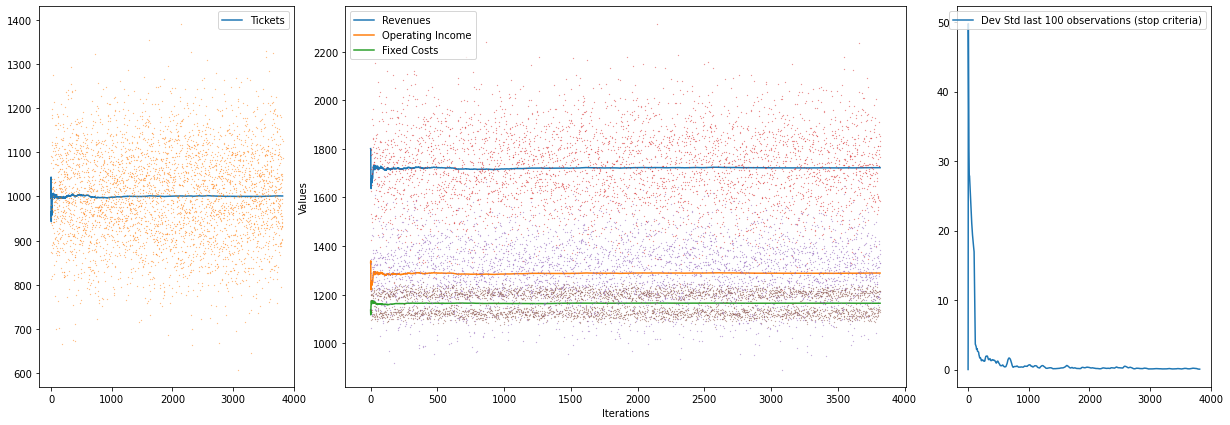

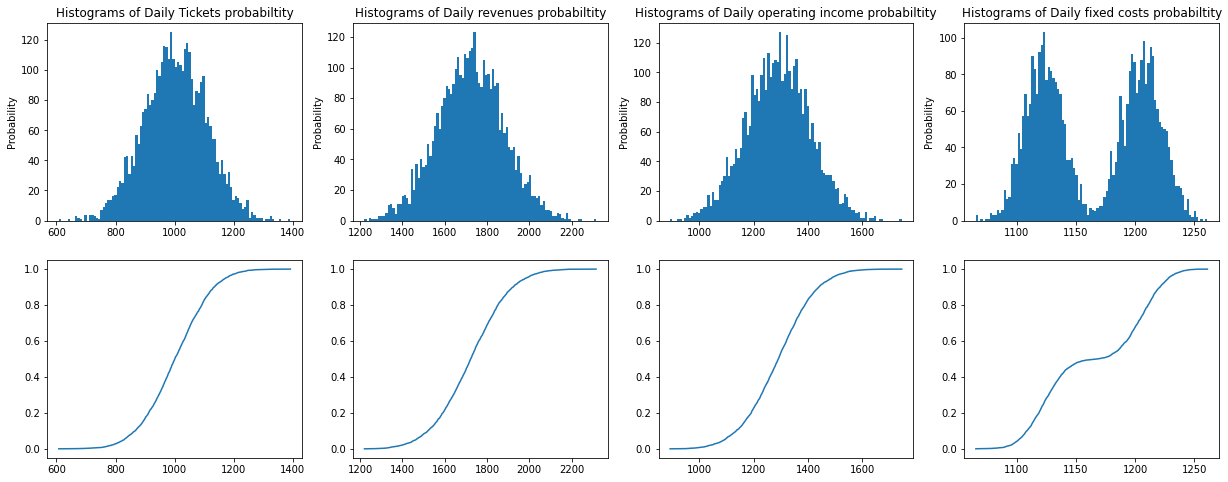

Iterations       :          3818 iterations
Investment       :        120000 €
Daily tickets    :        1001.0 tickets
Revenues         :     533982.52 €
Operating Income :     399542.83 €
Fixed cost       :     361056.42 €
Net Income       :      38486.41 €
ROI              :         32.07 %
Stop criteria    :        0.0497 (dev std)


In [4]:
answer = monte_carlo()

iterations = answer[3]
dailyTickets = answer[0]/answer[3]
yearlyFixedCosts = answer[4]/answer[3]*answer[5]
yearlyRevenues = answer[1]/answer[3]*answer[5]
yearlyOperatingIncome = answer[2]/answer[3]*answer[5]
yearlyNetIncome = yearlyOperatingIncome - yearlyFixedCosts
roi = yearlyNetIncome / investment * 100
stopCriteria = answer[6]

print("Iterations       : ", str(iterations).rjust(12),                      "iterations")
print("Investment       : ", str(round(investment,2)).rjust(12),            "€")
print("Daily tickets    : ", str(round(dailyTickets,0)).rjust(12),          "tickets")
print("Revenues         : ", str(round(yearlyRevenues,2)).rjust(12),        "€")
print("Operating Income : ", str(round(yearlyOperatingIncome,2)).rjust(12), "€")
print("Fixed cost       : ", str(round(yearlyFixedCosts,2)).rjust(12),      "€")
print("Net Income       : ", str(round(yearlyNetIncome,2)).rjust(12),       "€")
print("ROI              : ", str(round(roi,2)).rjust(12),                   "%")
print("Stop criteria    : ", str(round(stopCriteria,4)).rjust(12),          "(dev std)")